# MNIST CNN

In [15]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import model_from_json
from keras.datasets import mnist
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [10]:
# one-hot encoding
from keras.utils.np_utils import to_categorical

num_classes = 10
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
# one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test =  to_categorical(y_test, num_classes)

In [11]:

x_test.shape

(10000, 28, 28, 1)

In [6]:
#model
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 309s 5ms/step - loss: 0.1993 - acc: 0.9371
Epoch 2/10
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0595 - acc: 0.9820
Epoch 3/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0454 - acc: 0.9860
Epoch 4/10
60000/60000 [==============================] - 2313s 39ms/step - loss: 0.0360 - acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.0300 - acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0273 - acc: 0.9913
Epoch 7/10
60000/60000 [==============================] - 330s 6ms/step - loss: 0.0234 - acc: 0.9924
Epoch 8/10
60000/60000 [==============================] - 301s 5ms/step - loss: 0.0210 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 347s 6ms/step - loss: 0.0189 - acc: 0.9938
Epoch 10/10
60000/60000 [==============================] - 308s 5ms/step - loss: 0.0197 -

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.015319117847698726
Test accuracy: 0.9952


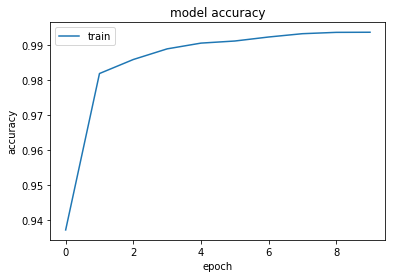

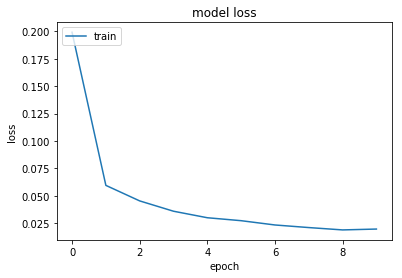

In [16]:
import sklearn.metrics as metrics
#Accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
from sklearn import metrics
pred = model.predict(x_test)

In [18]:
metrics.confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1, 1031,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1005,    0,    4,    0,    0,    1,    0],
       [   0,    0,    0,    0,  978,    0,    1,    0,    1,    2],
       [   0,    0,    0,    2,    0,  889,    1,    0,    0,    0],
       [   2,    1,    0,    0,    1,    3,  949,    0,    2,    0],
       [   0,    2,    8,    0,    0,    0,    0, 1015,    1,    2],
       [   0,    0,    2,    1,    0,    0,    0,    0,  970,    1],
       [   0,    0,    1,    0,    3,    2,    0,    2,    0, 1001]])